
Link to the Dataset: https://www.kaggle.com/nltkdata/movie-review?select=movie_review.csv


# Requirements 

Download the file and set it as a Dataframe. 

Remove punctuations, special characters and stopwords from the text column. Convert the text to lower case. 

Create two objects X and y. X will be the 'text' column dataframe and y will be the “tag” column. create a 
CountVectorizer object and split the data into training and testing sets. Train a MultinomialNB model and Display the confusion Matrix 

Display the POS tagging on the first 4 rows of ‘text’ (4 Marks)

# Importing all required modules

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from collections import Counter

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os

## for statistical tests
import scipy
from scipy.stats import f_oneway
 
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 10,10

from nltk.stem import WordNetLemmatizer

import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from sklearn.preprocessing import MinMaxScaler
from nltk import word_tokenize, pos_tag, pos_tag_sents

from wordcloud import WordCloud

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,f1_score,recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shiprasonal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/shiprasonal/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shiprasonal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Importing Data
* We are using Pandas and Numpy for Data manupulation

In [2]:
df=pd.read_csv("movie_review.csv")
df.head()

,fold_id,cv_tag,html_id,sent_id,text,tag
0,0,cv000,29590,0,films adapted from comic books have had plenty...,pos
1,0,cv000,29590,1,"for starters , it was created by alan moore ( ...",pos
2,0,cv000,29590,2,to say moore and campbell thoroughly researche...,pos
3,0,cv000,29590,3,"the book ( or "" graphic novel , "" if you will ...",pos
4,0,cv000,29590,4,"in other words , don't dismiss this film becau...",pos


## Creating the numerical verison of class variable for easy analysis

In [3]:
#replace pos and neg as '1' and 'o'
df.tag[df.tag == 'pos'] = 1
df.tag[df.tag == 'neg'] = 0

/var/folders/60/_t6rmt1x0yb3p89k1tpr66dh0000gn/T/ipykernel_4177/3284098279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.tag[df.tag == 'pos'] = 1
/var/folders/60/_t6rmt1x0yb3p89k1tpr66dh0000gn/T/ipykernel_4177/3284098279.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.tag[df.tag == 'neg'] = 0


### Basic EDA

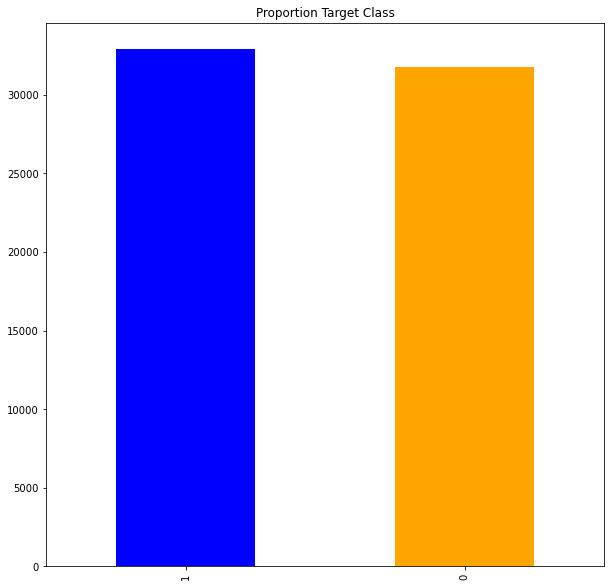

In [4]:
count_class=pd.value_counts(df["tag"], sort= True)
count_class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Proportion Target Class')
plt.show()

In [5]:
print('Positive reviews', round(df['tag'].value_counts()[1]/len(df) * 100), '%')
print('Negative Reviews', round(df['tag'].value_counts()[0]/len(df) * 100), '%')

Positive reviews 51 %
Negative Reviews 49 %


In [6]:
print(df.text.values[0],'\n'*5,df.text.values[4567])

films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before . 




 " pretty woman " does not blatantly step wrong until the very last scene , which is a happy ending ( as you'd expect , and wouldn't have it any other way ) that somehow does not work , perhaps because of its undeniable contrivances .


### Expanding Contraction

In [7]:
contractions_dict = {     
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I had",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "iit will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [8]:
def expand_contractions(text, contractions_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match) \
            if contractions_dict.get(match) \
            else contractions_dict.get(match.lower())
        expanded_contraction = expanded_contraction
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text
def cons(text):
    text=expand_contractions(text,contractions_dict)
    return text

df['text'] = df['text'].apply(lambda x: cons(x))

### Shuffling Data based on Tags

In [9]:
# shuffle the df well and check for the tag column changes
from sklearn.utils import shuffle
df = shuffle(df).reset_index()
df.head() 

,index,fold_id,cv_tag,html_id,sent_id,text,tag
0,14466,4,cv454,2053,18,"on his way out , a police officer jokingly tel...",1
1,48018,4,cv478,15921,3,i hated this movie for every second that i sat...,0
2,39221,1,cv199,9721,21,some atrociously written casual exchanges betw...,0
3,29410,8,cv895,21022,24,"i liked these scenes best , because the politi...",1
4,6401,2,cv206,14293,42,i found the choice of b . d .,1


In [10]:
df = df[['text','tag']]
df.head()

,text,tag
0,"on his way out , a police officer jokingly tel...",1
1,i hated this movie for every second that i sat...,0
2,some atrociously written casual exchanges betw...,0
3,"i liked these scenes best , because the politi...",1
4,i found the choice of b . d .,1


### Checking missing values

In [11]:
for i in (df.columns):
    # count number of rows with missing values
    n_miss = df[[i]].isnull().sum()
    perc = n_miss / df.shape[0] * 100
    print('> %s , Missing: %d (%.1f%%)' % (i, n_miss, perc))

> text , Missing: 0 (0.0%)
> tag , Missing: 0 (0.0%)


# Text Data Preprocessing
* Lower
* Stopword Removal
* Lemmatization
* Remove Special Character

In [12]:
#convert to lowercase, strip and remove punctuations
def preprocess(text):
    text = text.lower() 
    text=text.strip()  
    text=re.compile('<.*?>').sub('', text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  
    text = re.sub('\s+', ' ', text)  
    text = re.sub(r'\[[0-9]*\]',' ',text) 
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text) 
    return text

 
# STOPWORD REMOVAL
def stopword(string):
    stop_words = stopwords.words('english')
    stop_words.extend(['a','an', 'the', 'was', 'were', 'their', 'his', 'her', 'to', 'in', 'that', 'ia', 'on', 'at', 'of', 'aa', 'aas', 'for'])
    a= [i for i in string.split() if i not in stop_words]
    return ' '.join(a)

# Commonwords REMOVAL
def common_words(string,common_words_list):
    ## Remove top common words between positive and negative reviews
#     common_words.extend(['act','action','actor','also','another','around','audience','back','bad','become','best','big','cast','character','come','comedy','could','day','director','end','even','every','fact','film','find','first','funny','get','give','go','good','great','however','know','last','life','like','little','long','look','love','make','man','many','movie','much','never','new','old','one','part','people','performance','play','plot','real','really','role','run','say','scene','see','seem','set','show','something','star','still','story','take','thing','think','though','time','try','turn','two','u','use','want','watch','way','well','work','would','year'])
#     print(common_words)
    a= [i for i in string.split() if i not in common_words_list]
    return ' '.join(a)

#LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)


# Remove Special Characters
df = df.replace(r'[^0-9a-zA-Z ]', ' ', regex=True).replace("'", '')

# Lemmatization+Stopword Removal+ PreProcessing
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))


df['text'] = df['text'].apply(lambda x: finalpreprocess(x))

# common_words_list = list(set([x[0] for x in Counter(" ".join(df[df['tag']== 1]['text']).\
#                  split()).most_common(50)]).intersection(
# [x[0] for x in Counter(" ".join(df[df['tag']== 0]['text']).\
#                  split()).most_common(50)]))

# df['text'] = df['text'].apply(lambda x: common_words(x,common_words_list))
df.head()

,text,tag
0,way police officer jokingly tell man know kimb...,1
1,hat movie every second sat watch actively hate...,0
2,atrociously write casual exchange several male...,0
3,like scene best political become personal,1
4,find choice b,1


### Most Common Words in Positive Review

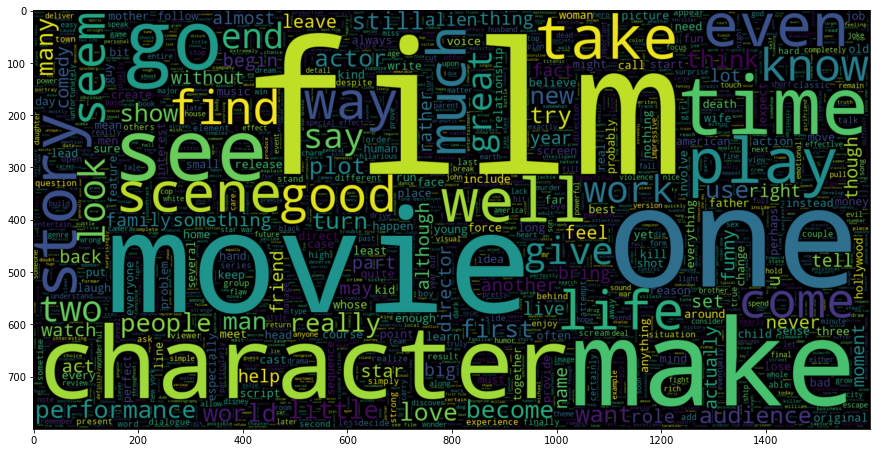

In [13]:
plt.figure(figsize = (15,15)) # Text that is recommended
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(df[df.tag == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

### Most Common Words in Negative Review

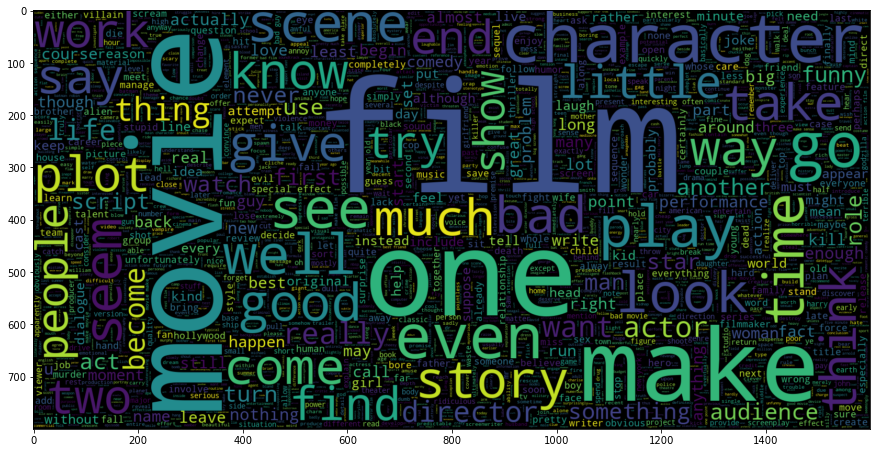

In [14]:
plt.figure(figsize = (15,15)) # Text that is recommended
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(df[df.tag == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

### Check Most Common Words in Each Target Variable Values

In [15]:
count1 = Counter(" ".join(df[df['tag']== 1]['text']).\
                 split()).most_common(50)
df1= pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "common_words", 1 : "count"})
df1.head(10)

,common_words,count
0,film,6162
1,movie,3163
2,one,3156
3,make,2169
4,character,2064
5,like,1930
6,see,1787
7,get,1736
8,time,1576
9,go,1477


In [16]:
count2 = Counter(" ".join(df[df['tag']== 0]['text']).\
                 split()).most_common(50)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "common_words", 1 : "count"})
df2.head(10)

,common_words,count
0,film,4973
1,movie,3818
2,one,2874
3,make,2077
4,like,2004
5,get,1994
6,character,1815
7,go,1564
8,time,1425
9,even,1401


## Extracting common words between Positive and Negative Reviews
### These words are added to Stopwords list and removed due to redundancy

In [17]:
set(list(df1.common_words)).intersection(list(df2.common_words))

{'also',
 'character',
 'come',
 'could',
 'end',
 'even',
 'film',
 'find',
 'first',
 'get',
 'give',
 'go',
 'good',
 'know',
 'like',
 'little',
 'look',
 'make',
 'man',
 'movie',
 'much',
 'never',
 'one',
 'people',
 'play',
 'really',
 'say',
 'scene',
 'see',
 'seem',
 'show',
 'star',
 'story',
 'take',
 'thing',
 'time',
 'two',
 'way',
 'well',
 'work',
 'would',
 'year'}

### Create Pipeline to generate countvectorizer and run MultinomialNB model

In [18]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())])
tuned_parameters = {
    'vect__ngram_range': [(1,1),(1,2),(2,2),(1,3)],
    'tfidf__use_idf': [True],#removed False after studying iterations
    'tfidf__norm': ('l1','l2'),
    'clf__alpha': [1,1e-1,1e-2]
#     'vect__max_df': (0.5, 0.75, 0.9,1.0),
#     'vect__min_df': (0.5, 0.25, 0.01,0),
#     'vect__max_features': (None, 5000, 10000, 50000)
}


### Train Test Split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df.tag, test_size=0.30, random_state=42)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Model Training using Gridsearch

In [20]:
scoring = ['accuracy', 'precision','f1','recall']
clf = GridSearchCV(text_clf, tuned_parameters, cv=2, scoring='accuracy',verbose=4)

clf.fit(X_train, y_train.astype(int))

print(classification_report(y_test, clf.predict(X_test), digits=4))

Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV 1/2] END clf__alpha=1, tfidf__norm=l1, tfidf__use_idf=True, vect__ngram_range=(1, 1);, score=0.655 total time=   0.4s
[CV 2/2] END clf__alpha=1, tfidf__norm=l1, tfidf__use_idf=True, vect__ngram_range=(1, 1);, score=0.660 total time=   0.4s
[CV 1/2] END clf__alpha=1, tfidf__norm=l1, tfidf__use_idf=True, vect__ngram_range=(1, 2);, score=0.650 total time=   1.0s
[CV 2/2] END clf__alpha=1, tfidf__norm=l1, tfidf__use_idf=True, vect__ngram_range=(1, 2);, score=0.655 total time=   1.0s
[CV 1/2] END clf__alpha=1, tfidf__norm=l1, tfidf__use_idf=True, vect__ngram_range=(2, 2);, score=0.587 total time=   0.8s
[CV 2/2] END clf__alpha=1, tfidf__norm=l1, tfidf__use_idf=True, vect__ngram_range=(2, 2);, score=0.590 total time=   0.9s
[CV 1/2] END clf__alpha=1, tfidf__norm=l1, tfidf__use_idf=True, vect__ngram_range=(1, 3);, score=0.641 total time=   1.8s
[CV 2/2] END clf__alpha=1, tfidf__norm=l1, tfidf__use_idf=True, vect__ngram_range=(1,

# Print Train and Test Accuracy

In [21]:
p_train = clf.predict(X_train)
p_test = clf.predict(X_test)

acc_train = accuracy_score(y_train, p_train)
acc_test = accuracy_score(y_test, p_test)

print(f'Train ACC: {acc_train}, Test ACC: {acc_test}')

Train ACC: 0.9654997351227265, Test ACC: 0.7036979810465596


# Printing Best model details 

In [22]:
clf.best_estimator_

Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB(alpha=1))])

# Classification Metrics

				CLASSIFICATIION METRICS

              precision    recall  f1-score   support

           0       0.72      0.63      0.67      9433
           1       0.69      0.77      0.73      9983

    accuracy                           0.70     19416
   macro avg       0.71      0.70      0.70     19416
weighted avg       0.71      0.70      0.70     19416

Confusion Matrix 
 [[5929 3504]
 [2249 7734]]
Total Negative Reivews or N:              9433
Total Positive Reviews or P:                  9983
Total Negative Reviews Predicted or N^:   8178
Total Positive Rreviews Predicted or P^:       11238


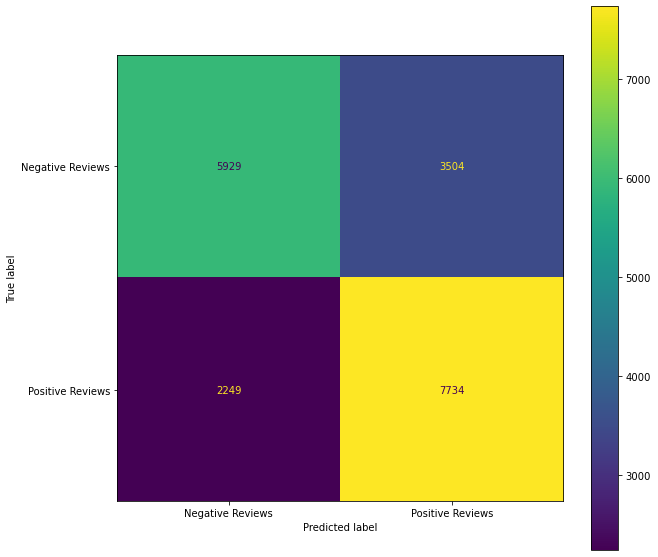

In [24]:
y_pred = clf.predict(X_test)

# # Classification report
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred)) 

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Negative Reviews','Positive Reviews'])
print('Confusion Matrix \n',cm)
print('Total Negative Reivews or N:             ' ,cm[0].sum())
print('Total Positive Reviews or P:                 ',cm[1].sum())
print('Total Negative Reviews Predicted or N^:  ' ,cm[0][0]+cm[1][0])
print('Total Positive Rreviews Predicted or P^:      ',cm[0][1]+cm[1][1])
cmd.plot()


# Display the POS tagging on the first 4 rows of ‘text’ (4 Marks)

In [25]:
texts = df['text'].tolist()
tagged_texts = pos_tag_sents(map(word_tokenize, texts))
tagged_texts
df['POS'] = tagged_texts

df.head(4)

,text,tag,POS
0,way police officer jokingly tell man know kimb...,1,"[(way, NN), (police, JJ), (officer, NN), (joki..."
1,hat movie every second sat watch actively hate...,0,"[(hat, RB), (movie, NN), (every, DT), (second,..."
2,atrociously write casual exchange several male...,0,"[(atrociously, RB), (write, JJ), (casual, JJ),..."
3,like scene best political become personal,1,"[(like, IN), (scene, NN), (best, RB), (politic..."


# Build and display a dependency parser tree for the sentence:

“Following Jon's death in a mutiny, he is one of Jon's loyalists who find his body and barricade themselves inside his quarters, refusing to acknowledge Thorne's leadership.” (2 Marks)

In [26]:
import spacy
from spacy import displacy

nlp = spacy.load('en_core_web_sm')
doc = nlp(u'This is a sentence.')

doc = nlp(u"Following Jon's death in a mutiny, he is one of Jon's loyalists who find his body and barricade themselves inside his quarters, refusing to acknowledge Thorne's leadership.")
displacy.render(doc, style='dep',jupyter=True)